# Session 2. Exercise: train and use NMIST
# Ville Seeste 1503540

In [112]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import keras.preprocessing.image as kimage

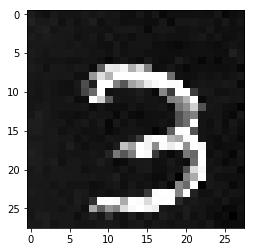

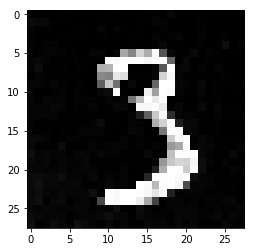

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 

In [113]:
y_train = np.empty((30,))
x_train = np.empty((30,28*28))

# shape images and add to x_train
for i in range(1,31):
    num = format(i, '02d')
    filename = 'digit_pictures/train_images/number_' + str(num) + '.jpg'
    pic = kimage.load_img(filename, grayscale=True, target_size=(28,28))
    pic = np.reshape(pic,(-1, 28 * 28)) / 255.0
    x_train[i-1] = pic
    
# add labels to y_train and categorize them
i = 0
ind = 0
while i < 3:
    y = 0
    while y < 10:
        y_train[ind] = y
        ind += 1
        y += 1
    i += 1
y_train = keras.utils.to_categorical(y_train)



# Same thing for test data
x_test = np.empty((10,28*28))
y_test = np.empty((10,))

# shape images and add to x_test
for i in range(1,11):
    num = format(i, '02d')
    filename = 'digit_pictures/test_images/number_' + str(num) + '.jpg'
    pic = kimage.load_img(filename, grayscale=True, target_size=(28,28))
    pic = np.reshape(pic,(-1, 28 * 28)) / 255.0
    x_test[i-1] = pic
    
# add labels to y_test and categorize them
y = 0
while y < 10:
    y_test[y] = y
    y += 1
y_test = keras.utils.to_categorical(y_test)

# Test that these work

# print number
plt.imshow(np.reshape(x_train[3],(28,28)), cmap=plt.cm.binary)
plt.show()
plt.imshow(np.reshape(x_test[3],(28,28)), cmap=plt.cm.binary)
plt.show()
print(y_test)
print(y_train)


In [114]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(28 * 28,), activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [115]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_data=(x_test,y_test), shuffle=True)

Train on 30 samples, validate on 10 samples
Epoch 1/50
30/30 [==============================] - 0s 9ms/step - loss: 2.5610 - acc: 0.0667 - val_loss: 2.4728 - val_acc: 0.1000
Epoch 2/50
30/30 [==============================] - 0s 301us/step - loss: 2.4209 - acc: 0.1333 - val_loss: 2.2694 - val_acc: 0.1000
Epoch 3/50
30/30 [==============================] - 0s 234us/step - loss: 2.3725 - acc: 0.1333 - val_loss: 2.1980 - val_acc: 0.1000
Epoch 4/50
30/30 [==============================] - 0s 301us/step - loss: 2.3440 - acc: 0.1333 - val_loss: 2.1754 - val_acc: 0.1000
Epoch 5/50
30/30 [==============================] - 0s 300us/step - loss: 2.3167 - acc: 0.1000 - val_loss: 2.1670 - val_acc: 0.2000
Epoch 6/50
30/30 [==============================] - 0s 234us/step - loss: 2.3265 - acc: 0.0667 - val_loss: 2.1540 - val_acc: 0.2000
Epoch 7/50
30/30 [==============================] - 0s 384us/step - loss: 2.2918 - acc: 0.1333 - val_loss: 2.1388 - val_acc: 0.2000
Epoch 8/50
30/30 [================

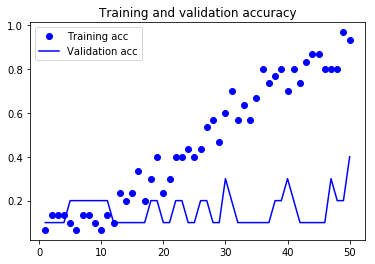

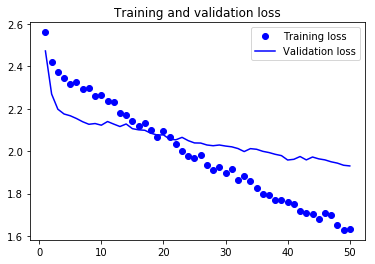

In [116]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Validation accuracy is bad because training dataset was so small. Also lighting conditions were different in train and test pictures. Would need much more data to be able to successfully predict these digits.